In [644]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [645]:
import .JuliaMBD

In [646]:
b = JuliaMBD.SimpleBlock(:test)
pout = JuliaMBD.OutPort(:a, Float64)
pin = JuliaMBD.InPort(:b, Float64)
JuliaMBD.set!(b, pout.name, pout)
JuliaMBD.set!(b, pin.name, pin)
pext = JuliaMBD.OutPort(:ex)
JuliaMBD.LineSignal(pext, pin, "s(t)")

"Line(##3178)"

In [264]:
JuliaMBD.tsort(JuliaMBD.allcomponents(b))

4-element Vector{Main.JuliaMBD.AbstractComponent}:
 "OutPort(ex)"
 "InPort(b)"
 "Block(test)"
 "OutPort(a)"

In [265]:
bb = JuliaMBD.Gain()

"Block(Gain)"

In [266]:
b1 = JuliaMBD.Inport(:t, Float64)
b2 = JuliaMBD.Gain(in=JuliaMBD.InPort(:gainin), out=JuliaMBD.OutPort(:gainout))
b3 = JuliaMBD.Outport(:y, Float64)
JuliaMBD.ConstSignal(:K, b2.env[:K])
JuliaMBD.LineSignal(b1.outports[1], b2.env[:in], "s(t)")
JuliaMBD.LineSignal(b2.env[:out], b3.inports[1], "s(t)")

"Line(##635)"

In [267]:
JuliaMBD.tsort(JuliaMBD.allcomponents(b3))

10-element Vector{Main.JuliaMBD.AbstractComponent}:
 "Parameter(##632)"
 "InPort(t)"
 "Block(Inport)"
 "OutPort(##631)"
 "InPort(gainin)"
 "Block(Gain)"
 "OutPort(gainout)"
 "InPort(##633)"
 "Block(Outport)"
 "OutPort(y)"

In [268]:
expr = [JuliaMBD._expr(m) for m = JuliaMBD.tsort(JuliaMBD.allcomponents(b3))]
    

10-element Vector{Expr}:
 :(var"##632" = K)
 :(())
 :(var"##631" = (Float64)(t))
 quote
    var"##634" = var"##631"
end
 :(gainin = var"##634")
 :(gainout = var"##632" * gainin)
 quote
    var"##635" = gainout
end
 :(var"##633" = var"##635")
 :(y = (Float64)(var"##633"))
 quote
end

In [293]:
function Sys1()
    b = JuliaMBD.SubSystemBlock(:Sys1)
    b1 = JuliaMBD.Inport(:t, Float64)
    b2 = JuliaMBD.Gain(K = JuliaMBD.ParameterPort(:K, Float64))
    b3 = JuliaMBD.Outport(:y, Float64)
    JuliaMBD.add!(b, b1)
    JuliaMBD.add!(b, b2)
    JuliaMBD.add!(b, b3)
    JuliaMBD.set!(b, :K, b2.env[:K])
    JuliaMBD.LineSignal(b1.env[:out], b2.env[:in], "s(t)")
    JuliaMBD.LineSignal(b2.env[:out], b3.env[:in], "s(t)")
    b
end


Sys1 (generic function with 1 method)

In [294]:
b = Sys1()

"Block(Sys1)"

In [295]:
expr = JuliaMBD.expr_function(b)

:(function Sys1_systemfunction(t::Float64; K::Float64)
      ()
      ()
      var"##692" = (Float64)(t)
      begin
          var"##696" = var"##692"
      end
      var"##693" = var"##696"
      var"##694" = K * var"##693"
      begin
          var"##697" = var"##694"
      end
      var"##695" = var"##697"
      y = (Float64)(var"##695")
      begin
      end
      (y = (Float64)(y),)
  end)

In [283]:
function Sys2()
    b = JuliaMBD.SubSystemBlock(:Sys2)
    b1 = JuliaMBD.Inport(:t, Float64)
    b2 = Sys1()
    b3 = JuliaMBD.Outport(:y, Float64)
    JuliaMBD.add!(b, b1)
    JuliaMBD.add!(b, b2)
    JuliaMBD.add!(b, b3)
    JuliaMBD.LineSignal(b1.env[:out], b2.env[:t], "s(t)")
    JuliaMBD.LineSignal(b2.env[:y], b3.env[:in], "s(t)")
    b
end


Sys2 (generic function with 1 method)

In [284]:
bb = Sys2()

"Block(Sys2)"

In [285]:
JuliaMBD.expr_function(bb)

:(function Sys2_systemfunction(t::Float64; )
      ()
      var"##667" = (Float64)(t)
      begin
          var"##676" = var"##667"
      end
      t = (Float64)(var"##676")
      var"##668" = (Float64)(t)
      begin
          var"##673" = var"##668"
      end
      var"##669" = K
      var"##670" = var"##673"
      var"##671" = var"##669" * var"##670"
      begin
          var"##674" = var"##671"
      end
      var"##672" = var"##674"
      y = (Float64)(var"##672")
      begin
          var"##677" = (Float64)(y)
      end
      var"##675" = var"##677"
      y = (Float64)(var"##675")
      begin
      end
      (y = (Float64)(y),)
  end)

In [236]:
expr = [JuliaMBD._expr(m) for m = JuliaMBD.tsort(JuliaMBD.allcomponents(p))]


MethodError: MethodError: no method matching allcomponents(::Main.JuliaMBD.OutPort{Any})
Closest candidates are:
  allcomponents(!Matched::Main.JuliaMBD.AbstractCompositeBlock) at /workspaces/JuliaMBD/src/_tsort.jl:26
  allcomponents(!Matched::Main.JuliaMBD.AbstractComponent) at /workspaces/JuliaMBD/src/_tsort.jl:37

In [249]:
b = JuliaMBD.Integrator(in=JuliaMBD.InPort(:in), sin=JuliaMBD.OutPort(:sin), sout=JuliaMBD.OutPort(:sout))
JuliaMBD.LineSignal(b.env[:out], b.env[:in], "s(t)")

"Line(##610)"

In [250]:
JuliaMBD.tsort(JuliaMBD.allcomponents(b.env[:in]))

6-element Vector{Main.JuliaMBD.AbstractComponent}:
 "OutPort(sin)"
 "Parameter(initialcondition)"
 "InPort(in)"
 "Parameter(saturationlimits)"
 "Block(Integrator)"
 "OutPort(sout)"

In [239]:
expr = [JuliaMBD._expr(m) for m = JuliaMBD.tsort(JuliaMBD.allcomponents(b.env[:in]))]


11-element Vector{Expr}:
 :(())
 :(out = var"##594")
 :(())
 quote
    var"##598" = out
end
 :(())
 :(in = var"##598")
 :(var"##593" = in)
 quote
    var"##597" = var"##593"
end
 :(var"##595" = var"##597")
 :(var"##596" = var"##595")
 quote
end

In [240]:
b = JuliaMBD.Add(signs=[:+, :-])

"Block(Add)"

In [241]:
b.inports

2-element Vector{Main.JuliaMBD.AbstractInPort}:
 "InPort(##600)"
 "InPort(##601)"

In [647]:
## RLC

function RLC(;R = :R, L = :L, C = :C)
    b = JuliaMBD.SubSystemBlock(:RLC)
    JuliaMBD.addparameter!(b, :R, R)
    JuliaMBD.addparameter!(b, :L, L)
    JuliaMBD.addparameter!(b, :C, C)
    int1 = JuliaMBD.Integrator(sin = JuliaMBD.OutPort(:int1sin), sout = JuliaMBD.OutPort(:int1sout))
    int2 = JuliaMBD.Integrator(sin = JuliaMBD.OutPort(:int2sin), sout = JuliaMBD.OutPort(:int2sout))
    in1 = JuliaMBD.Inport(:in1)
    out1 = JuliaMBD.Outport(:out1)
    gain1 = JuliaMBD.Gain()
    gain2 = JuliaMBD.Gain()
    gain3 = JuliaMBD.Gain()
    sum1 = JuliaMBD.Add(signs=[:+, :-, :-])
    JuliaMBD.add!(b, int1)
    JuliaMBD.add!(b, int2)
    JuliaMBD.add!(b, in1)
    JuliaMBD.add!(b, out1)
    JuliaMBD.add!(b, gain1)
    JuliaMBD.add!(b, gain2)
    JuliaMBD.add!(b, gain3)
    JuliaMBD.add!(b, sum1)
    JuliaMBD.ConstSignal(:R, gain1.env[:K])
    JuliaMBD.ConstSignal(:(1/C), gain2.env[:K])
    JuliaMBD.ConstSignal(:(1/L), gain3.env[:K])
    JuliaMBD.ConstSignal(:R, int1.env[:initialcondition])
    JuliaMBD.ConstSignal(:(C/L), int2.env[:initialcondition])
    JuliaMBD.LineSignal(in1.env[:out], sum1.env[:in1], "")
    JuliaMBD.LineSignal(gain1.env[:out], sum1.env[:in2], "")
    JuliaMBD.LineSignal(int1.env[:out], sum1.env[:in3], "")
    JuliaMBD.LineSignal(sum1.env[:out], gain3.env[:in], "")
    JuliaMBD.LineSignal(gain3.env[:out], int2.env[:in], "")
    JuliaMBD.LineSignal(int2.env[:out], out1.env[:in], "")
    JuliaMBD.LineSignal(int2.env[:out], gain1.env[:in], "")
    JuliaMBD.LineSignal(int2.env[:out], gain2.env[:in], "")
    JuliaMBD.LineSignal(gain2.env[:out], int1.env[:in], "")
    JuliaMBD.addscope!(b, :gain1, gain1.env[:out])
    b
end

RLC (generic function with 1 method)

In [648]:
## RLC test

function RLCTest(;R = :R, L = :L, C = :C, voltage = :voltage)
    b = JuliaMBD.SubSystemBlock(:RLCTest)
    JuliaMBD.addparameter!(b, :R, R)
    JuliaMBD.addparameter!(b, :L, L)
    JuliaMBD.addparameter!(b, :C, C)
    JuliaMBD.addparameter!(b, :voltage, voltage)
    system = RLC(R=R, L=L, C=C)
    source = JuliaMBD.Step()
    JuliaMBD.LineSignal(b.timeport, source.env[:time], "")
    JuliaMBD.ConstSignal(0.1, source.env[:steptime])
    JuliaMBD.ConstSignal(0.0, source.env[:initialvalue])
    JuliaMBD.ConstSignal(voltage, source.env[:finalvalue])
    JuliaMBD.add!(b, system)
    JuliaMBD.add!(b, source)
    JuliaMBD.LineSignal(source.env[:out], system.env[:in1], "")
    b
end

RLCTest (generic function with 1 method)

In [649]:
b = RLC() #R=10, L=100e-3, C=100e-6)
b = RLCTest(R=10, L=100e-3, C=100e-6, voltage=5)

"Block(RLCTest)"

In [650]:
eval(JuliaMBD.expr_sfunc(b))
eval(JuliaMBD.expr_ofunc(b))
eval(JuliaMBD.expr_ifunc(b))
m = JuliaMBD.ODEModel(
    b,
    eval(JuliaMBD.expr_odemodel_ifunc(b)),
    eval(JuliaMBD.expr_odemodel_sfunc(b)),
    eval(JuliaMBD.expr_odemodel_ofunc(b))
);

In [653]:
using DifferentialEquations
using Plots

In [652]:
result = JuliaMBD.simulate(m, (0,1));

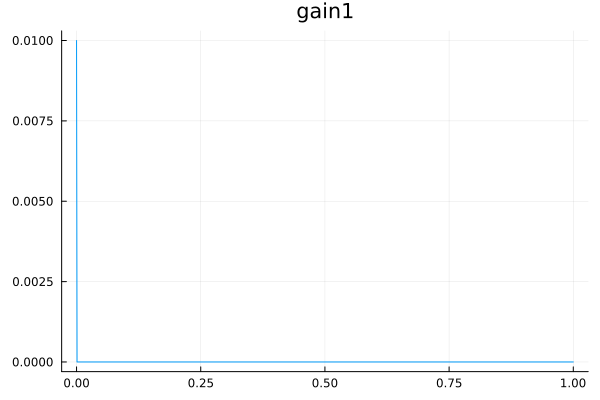

In [654]:
plot(result)

In [627]:
iv = m.ifunc(params)

2-element Vector{Float64}:
 10.0
  0.001

In [629]:
p = DifferentialEquations.ODEProblem(m.sfunc, iv, [0,1], params)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 1)
u0: 2-element Vector{Float64}:
 10.0
  0.001

In [630]:
sol = DifferentialEquations.solve(p)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 6-element Vector{Float64}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 1.0
u: 6-element Vector{Vector{Float64}}:
 [10.0, 0.001]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.0, 0.0]

In [632]:
ts = LinRange(0, 1, 100)
results = m.ofunc(sol, params, ts)

MethodError: MethodError: no method matching -(::Float64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
Closest candidates are:
  -(::Union{Float16, Float32, Float64}) at float.jl:381
  -(::T, !Matched::T) where T<:Union{Float16, Float32, Float64} at float.jl:384
  -(::Union{Float16, Float32, Float64}, !Matched::BigFloat) at mpfr.jl:465
  ...

In [634]:
sol(1)[1]

0.0